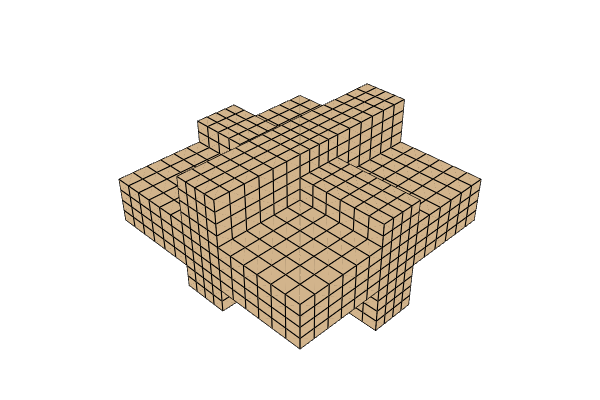

In [31]:
from polymesh.recipes import ribbed_plate

thickness = 0.2

mesh = ribbed_plate(lx=1, ly=1, t=thickness,
                    wx=0.2, hx=0.5, ex=0.05,
                    wy=0.2, hy=0.5, ey=-0.05,
                    lmax=0.07, order=2)

mesh.plot(notebook=True, jupyter_backend='static',
          window_size=(600, 400))


In [33]:
import numpy as np
from polymesh import PointData, CartesianFrame
from sigmaepsilon.fem.cells import H8, H27
from sigmaepsilon import PointData, SolidMesh as Mesh

E = 5000.  # Young's mpdulus
nu = 0.2  # Poisson's ratio
A = np.array([
    [1, nu, nu, 0, 0, 0],
    [nu, 1, nu, 0, 0, 0],
    [nu, nu, 1, 0, 0, 0],
    [0., 0, 0, (1-nu)/2, 0, 0],
    [0., 0, 0, 0, (1-nu)/2, 0],
    [0., 0, 0, 0, 0, (1-nu)/2]]) * (E / (1-nu**2))

GlobalFrame = CartesianFrame(dim=3)
coords = mesh.coords()
topo = mesh.topology()
pd = PointData(coords=coords, frame=GlobalFrame)
if topo.shape[1] == 8:
    cd = H8(topo=topo, frames=GlobalFrame, material=A)
else:
    cd = H27(topo=topo, frames=GlobalFrame, material=A)
mesh = Mesh(pd, cd, frame=GlobalFrame)


In [34]:
from sigmaepsilon.material.homg.rve import RepresentativeVolumeElement as RVE

rve = RVE(mesh=mesh)
ABDS = rve.to_Mindlin()

In [35]:
import pyvista as pv

dofsol = rve.nodal_dof_solution()
plotter = pv.Plotter(shape=(2, 4), window_size=(800, 600), notebook=False)
c = 0
for i in range(2):
    for j in range(4):
        plotter.subplot(i, j)
        rve.mesh.pd['x'] = coords + dofsol[:, :3, c]
        mesh.pvplot(notebook=False, plotter=plotter, return_plotter=True)
        c += 1
plotter.show()